In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

CONTRIBUTING.md                     basicRatingDraft3(joinGross).ipynb
LICENSE.md                          basics_gross_ratings.ipynb
README.md                           student.ipynb
awesome.gif                         zippedData/
basicRatingDraft2.ipynb


In [3]:
cd zippedData

/Users/eldrichvergarciadoyogan/Documents/Flatiron/Projects/Phase1Project/dsc-phase-1-project/zippedData


In [4]:
basic_df = pd.read_csv('imdb.title.basics.csv.gz')
gross_df = pd.read_csv('bom.movie_gross.csv.gz')
ratings_df = pd.read_csv('imdb.title.ratings.csv.gz')

In [5]:
basic_df.loc[basic_df['original_title'] == 'Harry Potter and the Deathly Hallows: Part 1']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
457,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery"


In [6]:
basic_df.info()
basic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [7]:
basic_df.loc[basic_df['tconst'].duplicated() == True]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


Because I will be joining this dataframe first through column 'tconst' and subsequently, 'primary_title'; I will address the null values after the merges.

In [8]:
basic_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [9]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
ratings_df.info()
ratings_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [11]:
ratings_df.duplicated().sum()

0

I will merge basic_df and ratings_df together with the former acting as the left dataframe in my leftjoin. In order to do this, I will set both indexes to be the column titles 'tconst': a column which both datasets share

In [12]:
basic_df = basic_df.set_index('tconst')

In [13]:
ratings_df = ratings_df.set_index('tconst')

In [14]:
basicRatings = basic_df.join(ratings_df)

In [15]:
basicRatings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [16]:
basicRatings.info()
basicRatings.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 13.9+ MB


,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,114405.000000,73856.000000,7.385600e+04
mean,2014.621798,86.187247,6.332729,3.523662e+03
std,2.733583,166.360590,1.474978,3.029402e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,70.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,6.500000,4.900000e+01
75%,2017.000000,99.000000,7.400000,2.820000e+02
max,2115.000000,51420.000000,10.000000,1.841066e+06


In [17]:
basicRatings.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [18]:
no_genres = basicRatings.loc[basicRatings['genres'].isna() == True]

In [19]:
no_genres.isna().sum()

primary_title         0
original_title       19
start_year            0
runtime_minutes    3236
genres             5408
averagerating      4604
numvotes           4604
dtype: int64

Because the same films that are missing genres, are also missing the majority of other columns, I will be dropping the rows which contain null values for the column 'genres'.

In [20]:
basicRatings = basicRatings[pd.notnull(basicRatings['genres'])]

In [21]:
basicRatings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140736 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    140736 non-null  object 
 1   original_title   140734 non-null  object 
 2   start_year       140736 non-null  int64  
 3   runtime_minutes  112233 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73052 non-null   float64
 6   numvotes         73052 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.6+ MB


In [22]:
genres = [genre.split(',') for genre in basicRatings['genres']]
genre_count = []
for element in genres:
    for count in element:
        if count not in genre_count:
            genre_count.append(count)

In [23]:
genre_count

['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Documentary',
 'History',
 'Mystery',
 'Sci-Fi',
 'Romance',
 'Family',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV',
 'Game-Show',
 'Short']

In [24]:
for count in genre_count:
    basicRatings[count] = 0

In [25]:
basicRatings.reset_index(inplace = True)

In [26]:
basicRatings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Crime,...,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140731,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
140732,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
140733,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
140734,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
for index, genre in enumerate(basicRatings['genres']):
    for count in genre_count:
        if count in genre:
            basicRatings.at[index, count] = 1


In [28]:
basicRatings[genre_count].sum()

Action         10335
Crime           6753
Drama          49883
Biography       8722
Comedy         25312
Fantasy         3516
Horror         10805
Thriller       11883
Adventure       6465
Animation       2799
Documentary    51640
History         6225
Mystery         4659
Sci-Fi          3365
Romance         9372
Family          6227
War             1405
Music           5624
Sport           2234
Western          467
Musical         1430
Adult             25
News            1551
Talk-Show         50
Reality-TV        98
Game-Show          4
Short             11
dtype: int64

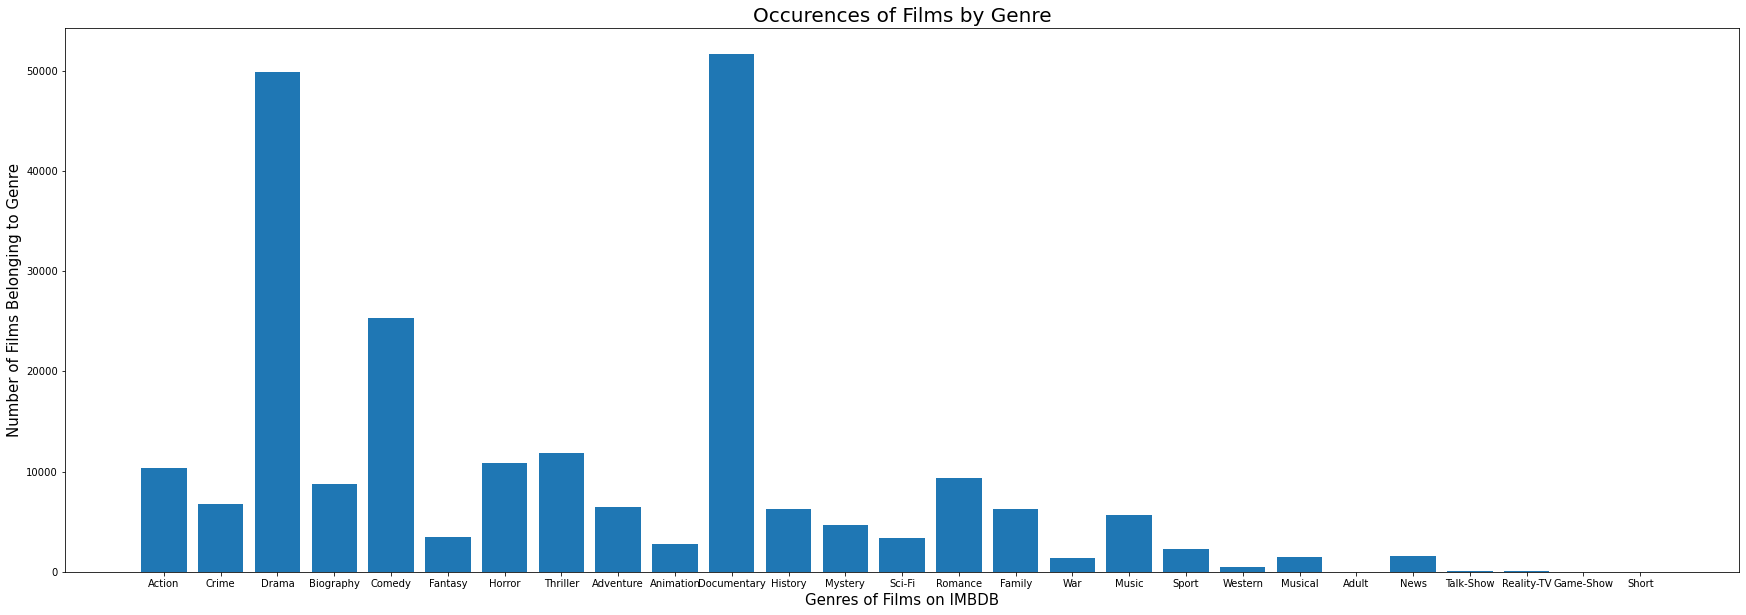

In [29]:
fig, ax = plt.subplots(figsize = (30,10))
ax.bar(x = genre_count , height = basicRatings[genre_count].sum())
ax.set_xlabel('Genres of Films on IMBDB', fontsize = 15)
ax.set_ylabel('Number of Films Belonging to Genre', fontsize = 15)
ax.set_title('Occurences of Films by Genre', fontsize = 20);

Below, I am removing the punctuation and converting the strings in the primary_title column in basicRatings as well as the strings in the title column in gross_df in order to join the dataframes more seamlessly.

In [30]:
from string import punctuation
for punc in punctuation:
    basicRatings['primary_title'] = basicRatings['primary_title'].str.replace(punc, '')
    gross_df['title'] = gross_df['title'].str.replace(punc, '')

In [31]:
basicRatings['primary_title'] = basicRatings['primary_title'].str.lower()
gross_df['title'] = gross_df['title'].str.lower()

In [32]:
basicRatings.merge(gross_df, how = 'left', left_on = 'primary_title', right_on = 'title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Crime,...,News,Talk-Show,Reality-TV,Game-Show,Short,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,1,1,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140733,tt9916428,the secret of china,The Secret of China,2019,NaN,"Adventure,History,War",NaN,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
140734,tt9916538,kuambil lagi hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
140735,tt9916622,rodolpho teóphilo o legado de um pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
140736,tt9916706,dankyavar danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [33]:
# gbr stands for gross, basic, ratings
gbr_df = basicRatings.merge(gross_df, how = 'left', left_on = 'primary_title', right_on = 'title')

In [34]:
gbr_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Crime,...,News,Talk-Show,Reality-TV,Game-Show,Short,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,1,1,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140733,tt9916428,the secret of china,The Secret of China,2019,NaN,"Adventure,History,War",NaN,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
140734,tt9916538,kuambil lagi hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
140735,tt9916622,rodolpho teóphilo o legado de um pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
140736,tt9916706,dankyavar danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [35]:
gbr_df.duplicated().sum()

0

In [36]:
gbr_df.loc[gbr_df['domestic_gross'].isna() == False]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Crime,...,News,Talk-Show,Reality-TV,Game-Show,Short,title,studio,domestic_gross,foreign_gross,year
35,tt0315642,wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,1,1,...,0,0,0,0,0,wazir,Relbig.,1100000.0,NaN,2016.0
42,tt0337692,on the road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,0,0,...,0,0,0,0,0,on the road,IFC,744000.0,8000000,2012.0
48,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,0,0,...,0,0,0,0,0,the secret life of walter mitty,Fox,58200000.0,129900000,2013.0
52,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,1,1,...,0,0,0,0,0,a walk among the tombstones,Uni.,26300000.0,26900000,2014.0
54,tt0369610,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1,0,...,0,0,0,0,0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140078,tt9816988,gold,Tala,2019,NaN,Drama,5.2,26.0,0,0,...,0,0,0,0,0,gold,Wein.,7200000.0,7700000,2017.0
140151,tt9827712,the first time,The First Time,2018,90.0,Drama,NaN,NaN,0,0,...,0,0,0,0,0,the first time,Gold.,22800.0,NaN,2012.0
140293,tt9851050,sisters,Sisters,2019,NaN,"Action,Drama",4.7,14.0,1,0,...,0,0,0,0,0,sisters,Uni.,87000000.0,18000000,2015.0
140328,tt9856484,the hunt,The Hunt,2019,90.0,Crime,NaN,NaN,0,1,...,0,0,0,0,0,the hunt,Magn.,613000.0,NaN,2013.0


In [37]:
gbr_df = gbr_df.loc[gbr_df['domestic_gross'].isna() == False]

In the cell below, the result shows that only films released between 2010 and 2020 are included in the dataframe. Therefore, the analyses this notebook make should be considered in reference to 2010-2020 box-office trends. 

In [38]:
[gbr_df['start_year'].unique()]

[array([2016, 2012, 2013, 2014, 2015, 2011, 2010, 2017, 2018, 2019, 2020])]

In [39]:
gbr_df[genre_count].sum()

Action          694
Crime           401
Drama          1958
Biography       329
Comedy         1024
Fantasy         193
Horror          271
Thriller        492
Adventure       469
Animation       169
Documentary     376
History         155
Mystery         234
Sci-Fi          146
Romance         514
Family          140
War              57
Music           123
Sport            60
Western          23
Musical          19
Adult             0
News              6
Talk-Show         0
Reality-TV        0
Game-Show         0
Short             0
dtype: int64

My analyses will ultimately use domestic_gross, foreign_gross, and total_gross as a measure of success. Dropping rows which contain null values for domestic_gross removed films classified as 'Adult', 'Talk-Show', 'Reality-TV', 'Game-Show', or 'Short'. Thus, I will be dropping these columns. 

In [40]:
gbr_df.drop(['Adult', 'Talk-Show', 'Reality-TV', 'Game-Show', 'Short' ], axis='columns', inplace = True) 

/Users/eldrichvergarciadoyogan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
tb_removed = ['Adult', 'Game-Show', 'Short', 'Reality-TV', 'Talk-Show']
for genre in tb_removed:
    genre_count.remove(genre)
gbr_df[genre_count].sum()

Action          694
Crime           401
Drama          1958
Biography       329
Comedy         1024
Fantasy         193
Horror          271
Thriller        492
Adventure       469
Animation       169
Documentary     376
History         155
Mystery         234
Sci-Fi          146
Romance         514
Family          140
War              57
Music           123
Sport            60
Western          23
Musical          19
News              6
dtype: int64

In [42]:
gbr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3516 entries, 35 to 140684
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3516 non-null   object 
 1   primary_title    3516 non-null   object 
 2   original_title   3516 non-null   object 
 3   start_year       3516 non-null   int64  
 4   runtime_minutes  3361 non-null   float64
 5   genres           3516 non-null   object 
 6   averagerating    3179 non-null   float64
 7   numvotes         3179 non-null   float64
 8   Action           3516 non-null   int64  
 9   Crime            3516 non-null   int64  
 10  Drama            3516 non-null   int64  
 11  Biography        3516 non-null   int64  
 12  Comedy           3516 non-null   int64  
 13  Fantasy          3516 non-null   int64  
 14  Horror           3516 non-null   int64  
 15  Thriller         3516 non-null   int64  
 16  Adventure        3516 non-null   int64  
 17  Animation  

In [43]:
for genre in genre_count:
    print(genre, gbr_df.loc[gbr_df[genre] == 1]['domestic_gross'].sum())

Action 40170250594.0
Crime 10057167900.0
Drama 32710605893.0
Biography 6638545998.0
Comedy 33999124193.0
Fantasy 11114727099.0
Horror 7575288700.0
Thriller 14045091999.0
Adventure 44241875595.0
Animation 14426340398.0
Documentary 6142340896.0
History 2948305498.0
Mystery 5947543900.0
Sci-Fi 15268939599.0
Romance 7731182998.0
Family 6312384999.0
War 391904300.0
Music 2286140999.0
Sport 2123833900.0
Western 535383700.0
Musical 550856300.0
News 21845400.0


In [44]:
genreDom = [(genre, gbr_df.loc[gbr_df[genre] == 1]
             ['domestic_gross'].sum()) for genre in genre_count]

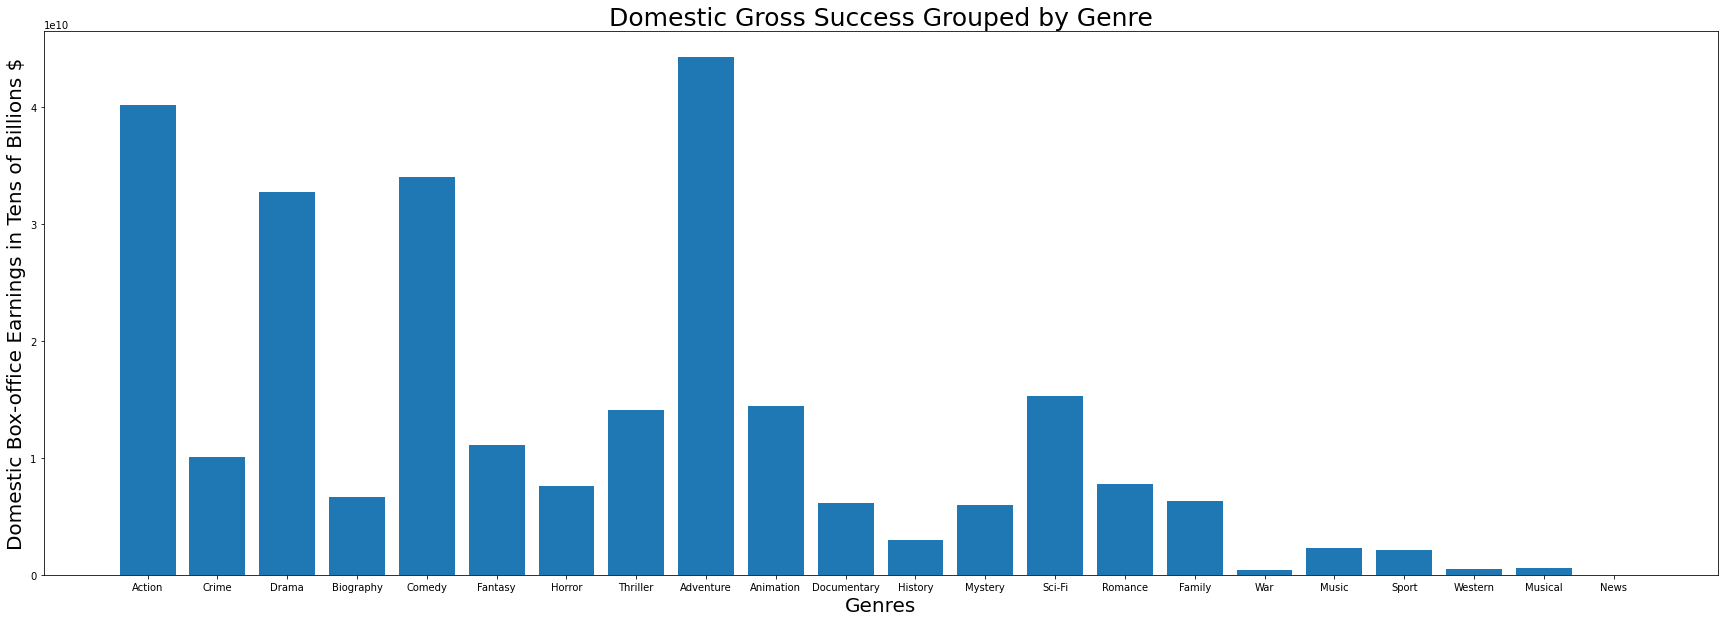

In [45]:
fig, ax = plt.subplots(figsize = (30,10))
ax.bar(x = [i[0] for i in genreDom] , height = [i[1] for i in genreDom])
ax.set_xlabel('Genres', fontsize = 20)
ax.set_ylabel('Domestic Box-office Earnings in Tens of Billions $', fontsize = 20)
ax.set_title('Domestic Gross Success Grouped by Genre', fontsize = 25);

In [46]:
gbr_df.loc[gbr_df['foreign_gross'].isna() == True]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Crime,...,Music,Sport,Western,Musical,News,title,studio,domestic_gross,foreign_gross,year
35,tt0315642,wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,1,1,...,0,0,0,0,0,wazir,Relbig.,1100000.0,NaN,2016.0
57,tt0376479,american pastoral,American Pastoral,2016,108.0,"Crime,Drama",6.1,12898.0,0,1,...,0,0,0,0,0,american pastoral,LGF,544000.0,NaN,2016.0
74,tt0409379,in secret,In Secret,2013,107.0,"Crime,Drama,Thriller",6.2,7045.0,0,1,...,0,0,0,0,0,in secret,RAtt.,444000.0,NaN,2014.0
79,tt0419692,disconnect,Disconnect,2010,112.0,"Drama,Mystery,Sci-Fi",4.5,190.0,0,0,...,0,0,0,0,0,disconnect,LD,1400000.0,NaN,2013.0
80,tt0420293,the stanford prison experiment,The Stanford Prison Experiment,2015,122.0,"Biography,Drama,History",6.9,32591.0,0,0,...,0,0,0,0,0,the stanford prison experiment,IFC,661000.0,NaN,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138679,tt9614490,little boy,Little boy,2019,NaN,Action,NaN,NaN,1,0,...,0,0,0,0,0,little boy,ORF,6500000.0,NaN,2015.0
139813,tt9778150,graduation,Graduation,2018,112.0,Documentary,NaN,NaN,0,0,...,0,0,0,0,0,graduation,IFC,176000.0,NaN,2017.0
139999,tt9805754,double trouble,Double Trouble,2013,99.0,"Comedy,Family",NaN,NaN,0,0,...,0,0,0,0,0,double trouble,CL,44800.0,NaN,2012.0
140151,tt9827712,the first time,The First Time,2018,90.0,Drama,NaN,NaN,0,0,...,0,0,0,0,0,the first time,Gold.,22800.0,NaN,2012.0


The column 'foreign_gross' in gbr_df is filled with strings instead interger or float values. I will be converting the strings to float values in order to mirror the data type used in the 'domestic_gross' column. 

In [47]:
gbr_df['foreign_gross'] = gbr_df['foreign_gross'].str.replace(',', "").astype(float)

<ipython-input-47-c2d17cd91ec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_df['foreign_gross'] = gbr_df['foreign_gross'].str.replace(',', "").astype(float)


In [48]:
gbr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3516 entries, 35 to 140684
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3516 non-null   object 
 1   primary_title    3516 non-null   object 
 2   original_title   3516 non-null   object 
 3   start_year       3516 non-null   int64  
 4   runtime_minutes  3361 non-null   float64
 5   genres           3516 non-null   object 
 6   averagerating    3179 non-null   float64
 7   numvotes         3179 non-null   float64
 8   Action           3516 non-null   int64  
 9   Crime            3516 non-null   int64  
 10  Drama            3516 non-null   int64  
 11  Biography        3516 non-null   int64  
 12  Comedy           3516 non-null   int64  
 13  Fantasy          3516 non-null   int64  
 14  Horror           3516 non-null   int64  
 15  Thriller         3516 non-null   int64  
 16  Adventure        3516 non-null   int64  
 17  Animation  

In order to keep the rows for column 'foreign_gross': I will be calculate the mean for the rows in 'domestic_gross' which does not have null value for 'foreign_gross', calculate the mean for the 'foreign_gross' non-null values, create a variable called ratio which will contain the ratio between the two means, and apply that ratio on 'domestic_gross' in rows where 'foreign_gross' is null. This process is framed by the the mathematical concepts of Ratios of Means and Ratio Estimation. This process will allow me to keep the rows, by plugging in predictive numbers for null 'foreign_gross' cells.

In [49]:
meanDom = gbr_df.loc[gbr_df['foreign_gross'].isna() == False]['domestic_gross'].mean()

In [50]:
meanForeign = gbr_df['foreign_gross'].mean()

In [51]:
meanDom , meanForeign

(47817299.09627183, 74340636.73662105)

In [52]:
gbr_df.loc[gbr_df['foreign_gross'].isna() == False]['foreign_gross'].mean()

74340636.73662105

In [53]:
ratio = (meanForeign / meanDom)

In [54]:
ratio

1.554680798406223

In [55]:
for genre in genre_count:
    print(genre, gbr_df.loc[gbr_df[genre] == 1]['foreign_gross'].sum())

Action 71422098557.9
Crime 10812382071.0
Drama 45133354692.0
Biography 7695437500.0
Comedy 47767678795.0
Fantasy 22078449699.0
Horror 9792668500.0
Thriller 22309033769.0
Adventure 82383679085.9
Animation 26609717998.0
Documentary 6850476600.0
History 3742636399.0
Mystery 8674319698.0
Sci-Fi 24527028388.9
Romance 9787369895.0
Family 9376246299.0
War 834816000.0
Music 2881722300.0
Sport 2320202500.0
Western 703923000.0
Musical 741185300.0
News 48000000.0


In [56]:
genreForeign = [(genre, gbr_df.loc[gbr_df[genre] == 1]
             ['foreign_gross'].sum()) for genre in genre_count]

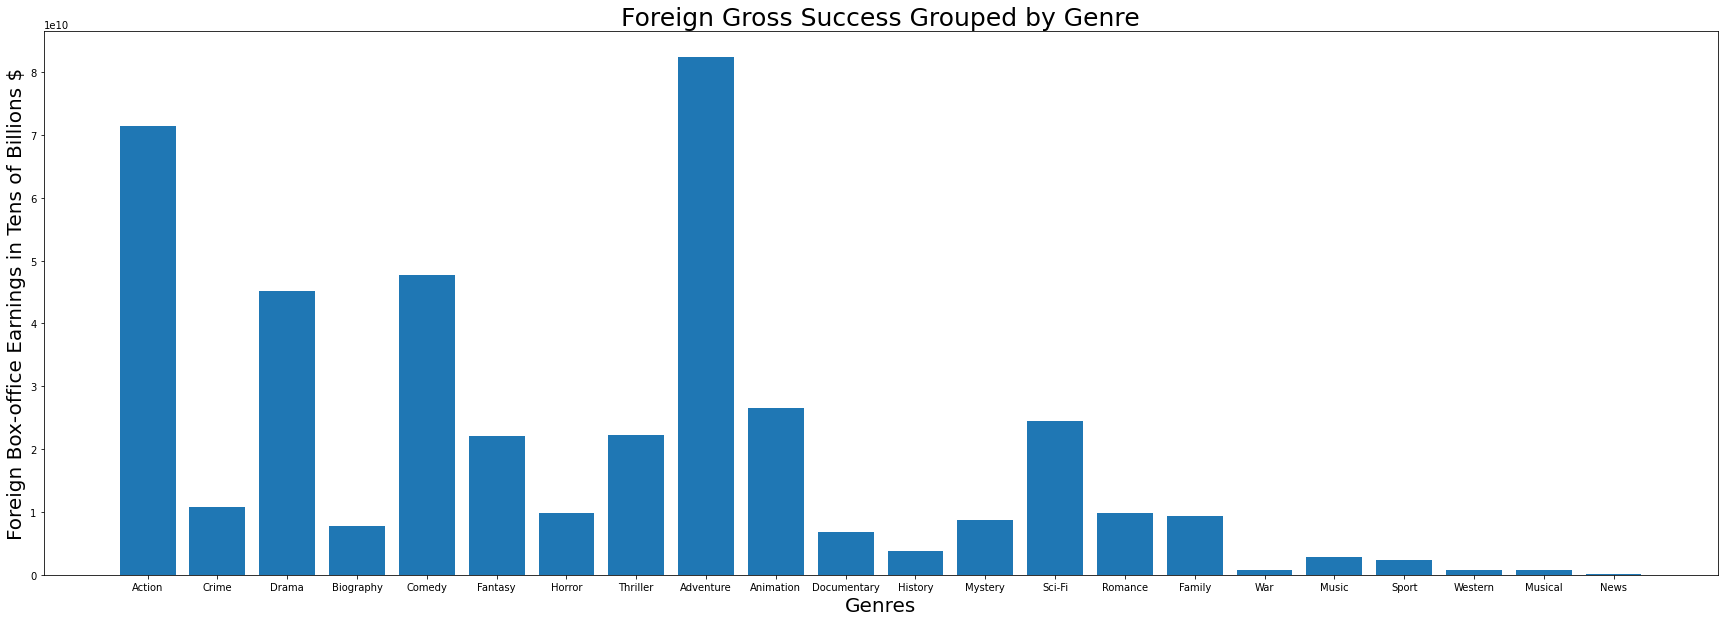

In [57]:
fig, ax = plt.subplots(figsize = (30,10))
ax.bar(x = [i[0] for i in genreForeign] , height = [i[1] for i in genreForeign])
ax.set_xlabel('Genres', fontsize = 20)
ax.set_ylabel('Foreign Box-office Earnings in Tens of Billions $', fontsize = 20)
ax.set_title('Foreign Gross Success Grouped by Genre', fontsize = 25);

In [58]:
gbr_df['foreign_gross'].fillna(round(gbr_df['domestic_gross'] * ratio), inplace = True)

/Users/eldrichvergarciadoyogan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [59]:
gbr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3516 entries, 35 to 140684
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3516 non-null   object 
 1   primary_title    3516 non-null   object 
 2   original_title   3516 non-null   object 
 3   start_year       3516 non-null   int64  
 4   runtime_minutes  3361 non-null   float64
 5   genres           3516 non-null   object 
 6   averagerating    3179 non-null   float64
 7   numvotes         3179 non-null   float64
 8   Action           3516 non-null   int64  
 9   Crime            3516 non-null   int64  
 10  Drama            3516 non-null   int64  
 11  Biography        3516 non-null   int64  
 12  Comedy           3516 non-null   int64  
 13  Fantasy          3516 non-null   int64  
 14  Horror           3516 non-null   int64  
 15  Thriller         3516 non-null   int64  
 16  Adventure        3516 non-null   int64  
 17  Animation  

In [60]:
gbr_df['foreign_gross'].mean() / gbr_df['domestic_gross'].mean()

1.554680798624854

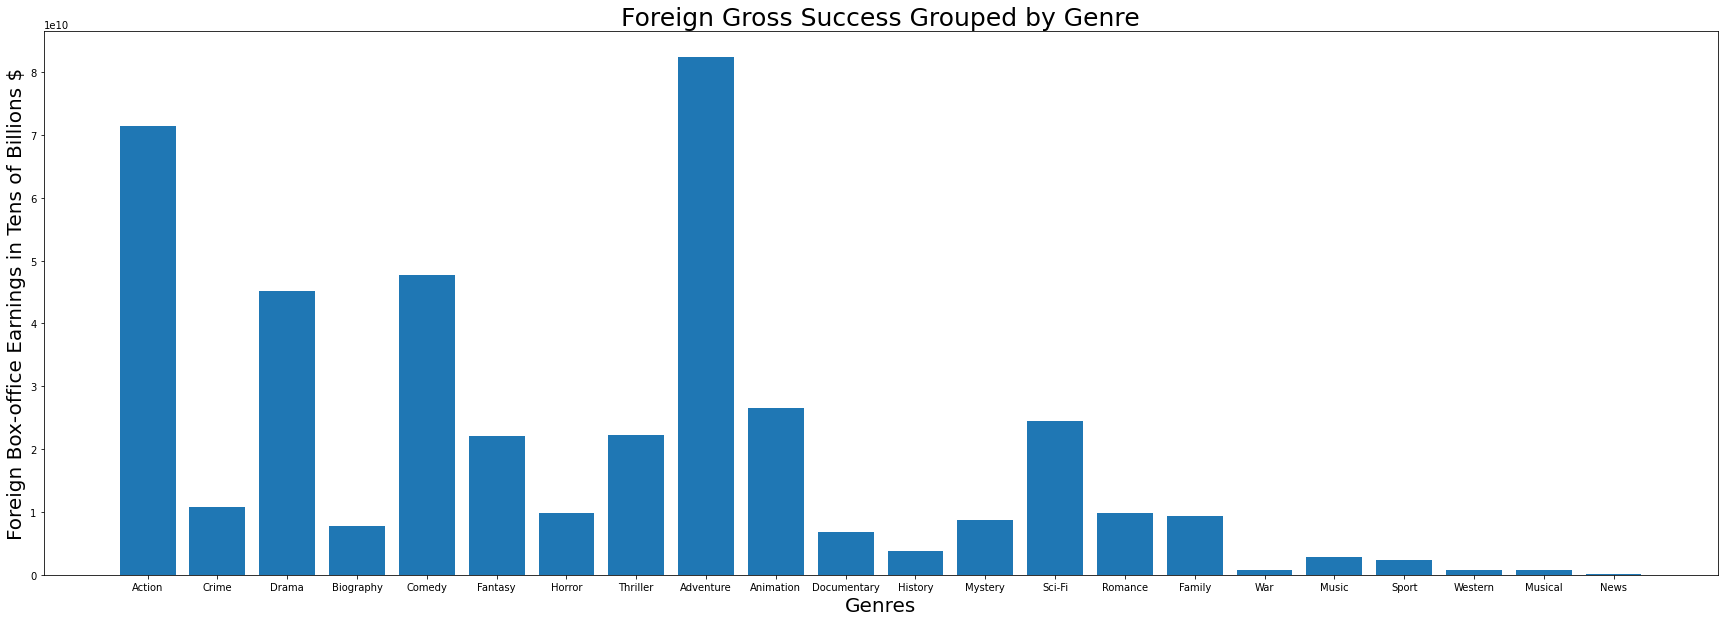

In [61]:
fig, ax = plt.subplots(figsize = (30,10))
ax.bar(x = [i[0] for i in genreForeign] , height = [i[1] for i in genreForeign])
ax.set_xlabel('Genres', fontsize = 20)
ax.set_ylabel('Foreign Box-office Earnings in Tens of Billions $', fontsize = 20)
ax.set_title('Foreign Gross Success Grouped by Genre', fontsize = 25);

In [62]:
price = []
genre = []
for genres, prices in genreDom:
    genre.append(genres)
    price.append(prices)

In [63]:
genreDom_dict = dict(zip(genre, price))
genreDom_dict

{'Action': 40170250594.0,
 'Crime': 10057167900.0,
 'Drama': 32710605893.0,
 'Biography': 6638545998.0,
 'Comedy': 33999124193.0,
 'Fantasy': 11114727099.0,
 'Horror': 7575288700.0,
 'Thriller': 14045091999.0,
 'Adventure': 44241875595.0,
 'Animation': 14426340398.0,
 'Documentary': 6142340896.0,
 'History': 2948305498.0,
 'Mystery': 5947543900.0,
 'Sci-Fi': 15268939599.0,
 'Romance': 7731182998.0,
 'Family': 6312384999.0,
 'War': 391904300.0,
 'Music': 2286140999.0,
 'Sport': 2123833900.0,
 'Western': 535383700.0,
 'Musical': 550856300.0,
 'News': 21845400.0}

In [64]:
gross = []
category = []
for categories, gross_ in genreForeign:
    category.append(categories)
    gross.append(gross_)


In [65]:
genreForeign_dict = dict(zip(category, gross))
genreForeign_dict

{'Action': 71422098557.9,
 'Crime': 10812382071.0,
 'Drama': 45133354692.0,
 'Biography': 7695437500.0,
 'Comedy': 47767678795.0,
 'Fantasy': 22078449699.0,
 'Horror': 9792668500.0,
 'Thriller': 22309033769.0,
 'Adventure': 82383679085.9,
 'Animation': 26609717998.0,
 'Documentary': 6850476600.0,
 'History': 3742636399.0,
 'Mystery': 8674319698.0,
 'Sci-Fi': 24527028388.9,
 'Romance': 9787369895.0,
 'Family': 9376246299.0,
 'War': 834816000.0,
 'Music': 2881722300.0,
 'Sport': 2320202500.0,
 'Western': 703923000.0,
 'Musical': 741185300.0,
 'News': 48000000.0}

In [66]:
dom_top3 = sorted(price, reverse = True)[:3]
foreign_top3 = sorted(gross, reverse = True)[:3]

In [67]:
dom_top3

[44241875595.0, 40170250594.0, 33999124193.0]

In [68]:
foreign_top3

[82383679085.9, 71422098557.9, 47767678795.0]

In [69]:
dom3_dict = {}
for key, value in genreDom_dict.items():
    if value in dom_top3:
        dom3_dict[key] = value

In [70]:
dom3_dict

{'Action': 40170250594.0, 'Comedy': 33999124193.0, 'Adventure': 44241875595.0}

In [71]:
foreign3_dict = {}
for key, value in genreForeign_dict.items():
    if value in foreign_top3:
        foreign3_dict[key] = value

In [72]:
foreign3_dict

{'Action': 71422098557.9, 'Comedy': 47767678795.0, 'Adventure': 82383679085.9}

If we're looking at the total gross of films by genre, the data suggests that films categorized as adventure, action, or comedy (in descending order), have earned the most in both domestic, and foreign box offices. 

In [73]:
for genre in genre_count:
    print(genre, gbr_df.loc[gbr_df[genre] == 1]['domestic_gross'].mean())

Action 57882205.46685879
Crime 25080219.20199501
Drama 16706131.712461695
Biography 20177951.36170213
Comedy 33202269.719726562
Fantasy 57589259.58031088
Horror 27953094.83394834
Thriller 28546934.957317073
Adventure 94332357.34541577
Animation 85362960.93491124
Documentary 16336013.021276595
History 19021325.793548387
Mystery 25416854.273504272
Sci-Fi 104581778.07534246
Romance 15041212.058365759
Family 45088464.27857143
War 6875514.03508772
Music 18586512.18699187
Sport 35397231.666666664
Western 23277552.173913043
Musical 28992436.842105262
News 3640900.0


In [74]:
genreDom_mean = [(genre, gbr_df.loc[gbr_df[genre] == 1]['domestic_gross'].mean()) for genre in genre_count]

In [75]:
genreForeign_mean = [(genre, gbr_df.loc[gbr_df[genre] == 1]['foreign_gross'].mean()) for genre in genre_count]

In [76]:
genreDom_mean

[('Action', 57882205.46685879),
 ('Crime', 25080219.20199501),
 ('Drama', 16706131.712461695),
 ('Biography', 20177951.36170213),
 ('Comedy', 33202269.719726562),
 ('Fantasy', 57589259.58031088),
 ('Horror', 27953094.83394834),
 ('Thriller', 28546934.957317073),
 ('Adventure', 94332357.34541577),
 ('Animation', 85362960.93491124),
 ('Documentary', 16336013.021276595),
 ('History', 19021325.793548387),
 ('Mystery', 25416854.273504272),
 ('Sci-Fi', 104581778.07534246),
 ('Romance', 15041212.058365759),
 ('Family', 45088464.27857143),
 ('War', 6875514.03508772),
 ('Music', 18586512.18699187),
 ('Sport', 35397231.666666664),
 ('Western', 23277552.173913043),
 ('Musical', 28992436.842105262),
 ('News', 3640900.0)]

In [77]:
genreForeign_mean

[('Action', 103600464.45806916),
 ('Crime', 28018277.840399),
 ('Drama', 24372002.48263534),
 ('Biography', 24982552.194528874),
 ('Comedy', 47789730.64160156),
 ('Fantasy', 114986232.20725389),
 ('Horror', 37163267.649446495),
 ('Thriller', 46336736.70731708),
 ('Adventure', 176229627.24285713),
 ('Animation', 157967181.30769232),
 ('Documentary', 19437133.30851064),
 ('History', 25418426.135483872),
 ('Mystery', 37754399.79487179),
 ('Sci-Fi', 168095307.6979452),
 ('Romance', 20287139.338521402),
 ('Family', 67729114.77142857),
 ('War', 16370401.228070175),
 ('Music', 24868865.024390243),
 ('Sport', 41755697.0),
 ('Western', 33136408.739130434),
 ('Musical', 39525849.2631579),
 ('News', 8062550.0)]

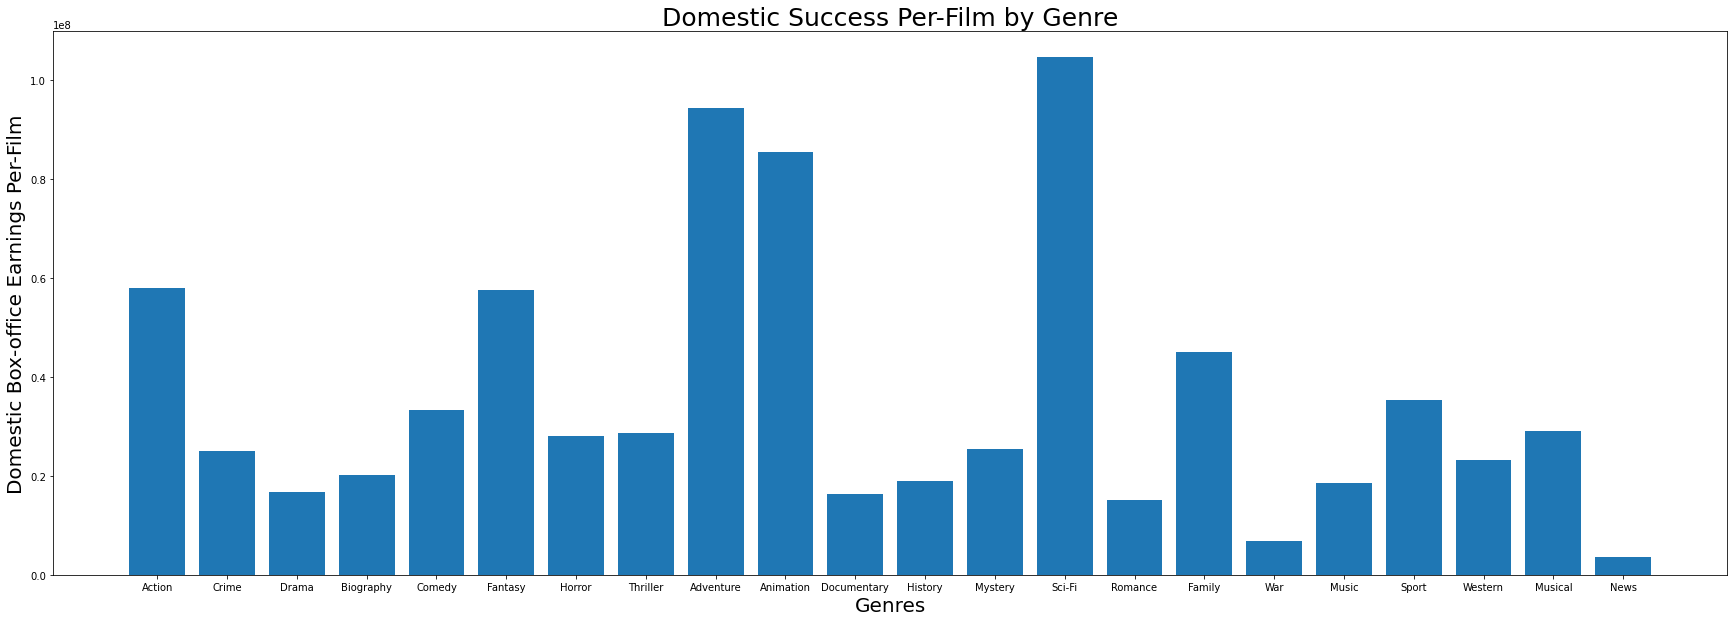

In [78]:
fig, ax = plt.subplots(figsize = (30,10))
ax.bar(x = [i[0] for i in genreDom_mean] , height = [i[1] for i in genreDom_mean])
ax.set_xlabel('Genres', fontsize = 20)
ax.set_ylabel('Domestic Box-office Earnings Per-Film', fontsize = 20)
ax.set_title('Domestic Success Per-Film by Genre', fontsize = 25);

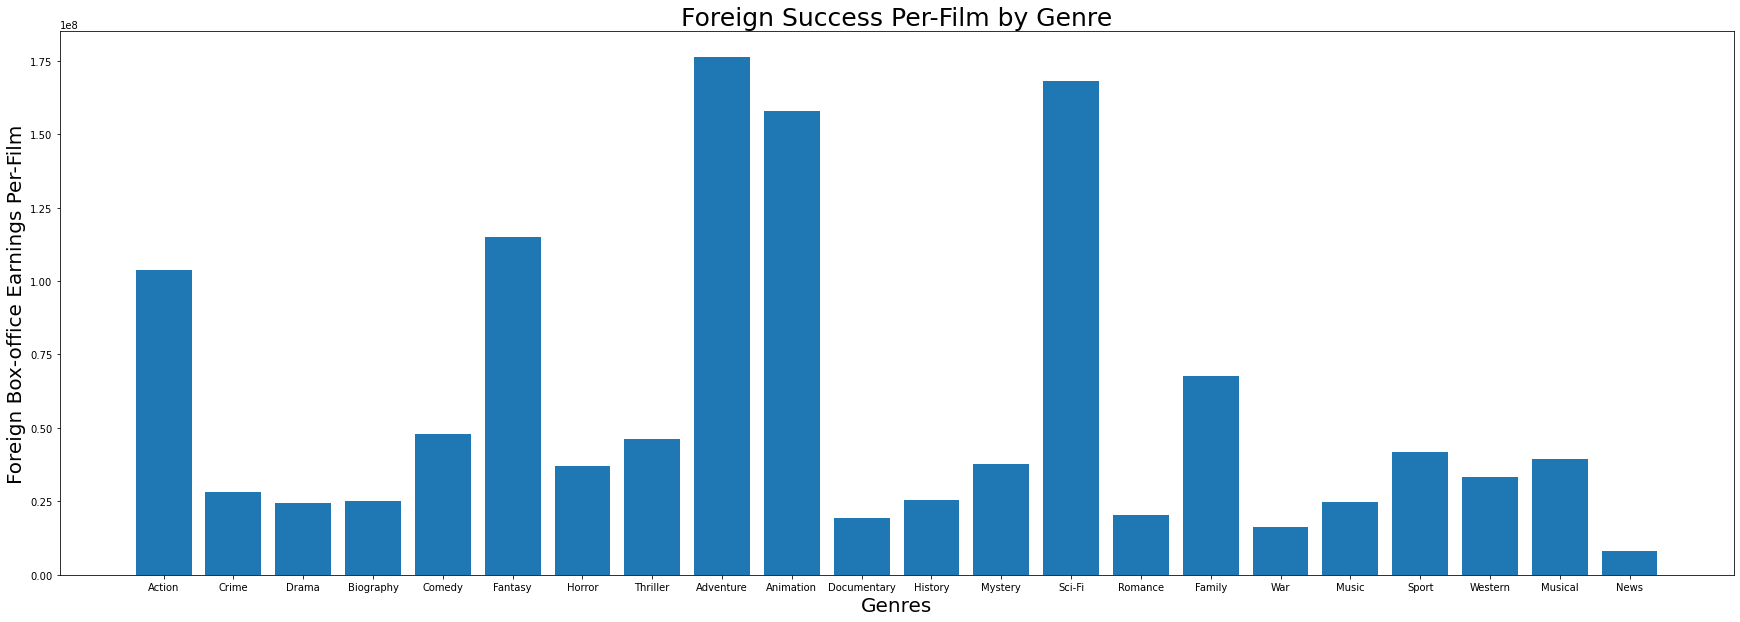

In [79]:
fig, ax = plt.subplots(figsize = (30,10))
ax.bar(x = [i[0] for i in genreForeign_mean] , height = [i[1] for i in genreForeign_mean])
ax.set_xlabel('Genres', fontsize = 20)
ax.set_ylabel('Foreign Box-office Earnings Per-Film', fontsize = 20)
ax.set_title('Foreign Success Per-Film by Genre', fontsize = 25);

In [80]:
foreignMean = []
foreignGenre = []
for genre, mean in genreForeign_mean:
    foreignMean.append(mean)
    foreignGenre.append(genre)

In [81]:
domMean = []
domGenre = []
for genre, mean in genreDom_mean:
    domMean.append(mean)
    domGenre.append(genre)

In [82]:
domMean_dict = dict(zip(domGenre, domMean))

In [83]:
foreignMean_dict = dict(zip(foreignGenre, foreignMean))

In [84]:
domMean_top3 = sorted(domMean, reverse = True)[:3]

In [85]:
domMean_top3

[104581778.07534246, 94332357.34541577, 85362960.93491124]

In [86]:
foreignMean_top3 = sorted(foreignMean, reverse = True)[:3]

In [87]:
foreignMean_top3

[176229627.24285713, 168095307.6979452, 157967181.30769232]

In [88]:
domMean3_dict = {}
for key, value in domMean_dict.items():
    if value in domMean_top3:
        domMean3_dict[key] = value

In [89]:
foreignMean3_dict = {}
for key, value in foreignMean_dict.items():
    if value in foreignMean_top3:
        foreignMean3_dict[key] = value

In [90]:
domMean3_dict

{'Adventure': 94332357.34541577,
 'Animation': 85362960.93491124,
 'Sci-Fi': 104581778.07534246}

In [91]:
foreignMean3_dict

{'Adventure': 176229627.24285713,
 'Animation': 157967181.30769232,
 'Sci-Fi': 168095307.6979452}

The mean box-office successes per film categorized by genre show that the profitability of a single film is different from the profitability of a genre. For example: sci-fi tops the list in terms of mean domestic gross per film while adventure dominates in foreign box-offices. Additionally, action and comedy are not included in the top three. The disclusion of these two genres suggests that although people continue to see them, their box-office success relies on the volume of films as opposed to focusing on box-office earnings per film. 

In [94]:
budget_gross = pd.read_csv('tn.movie_budgets.csv.gz')

In [95]:
budget_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [96]:
for punc in punctuation:
    budget_gross['movie'].str.replace(punc, '')

In [97]:
for punc in punctuation:
    budget_gross['movie'] = budget_gross['movie'].str.replace(punc, '')

In [98]:
budget_gross['movie'] = budget_gross['movie'].str.lower()

In [99]:
budge_gbr = gbr_df.merge(budget_gross, how = 'left', left_on = 'primary_title', right_on = 'movie')

In [100]:
budge_gbr.isna().sum()

tconst                  0
primary_title           0
original_title          0
start_year              0
runtime_minutes       156
genres                  0
averagerating         343
numvotes              343
Action                  0
Crime                   0
Drama                   0
Biography               0
Comedy                  0
Fantasy                 0
Horror                  0
Thriller                0
Adventure               0
Animation               0
Documentary             0
History                 0
Mystery                 0
Sci-Fi                  0
Romance                 0
Family                  0
War                     0
Music                   0
Sport                   0
Western                 0
Musical                 0
News                    0
title                   0
studio                  1
domestic_gross_x        0
foreign_gross           0
year                    0
id                   1852
release_date         1852
movie                1852
production_b

In [101]:
budge_gbr

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Crime,...,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0315642,wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,1,1,...,Relbig.,1100000.0,1710149.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0337692,on the road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,0,0,...,IFC,744000.0,8000000.0,2012.0,17.0,"Mar 22, 2013",on the road,"$25,000,000","$720,828","$9,313,302"
2,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,0,0,...,Fox,58200000.0,129900000.0,2013.0,37.0,"Dec 25, 2013",the secret life of walter mitty,"$91,000,000","$58,236,838","$187,861,183"
3,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,1,1,...,Uni.,26300000.0,26900000.0,2014.0,67.0,"Sep 19, 2014",a walk among the tombstones,"$28,000,000","$26,017,685","$62,108,587"
4,tt0369610,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1,0,...,Uni.,652300000.0,1019.4,2015.0,34.0,"Jun 12, 2015",jurassic world,"$215,000,000","$652,270,625","$1,648,854,864"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,tt9816988,gold,Tala,2019,NaN,Drama,5.2,26.0,0,0,...,Wein.,7200000.0,7700000.0,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3537,tt9827712,the first time,The First Time,2018,90.0,Drama,NaN,NaN,0,0,...,Gold.,22800.0,35447.0,2012.0,67.0,"Oct 19, 2012",the first time,"$2,000,000","$17,061","$17,061"
3538,tt9851050,sisters,Sisters,2019,NaN,"Action,Drama",4.7,14.0,1,0,...,Uni.,87000000.0,18000000.0,2015.0,57.0,"Dec 18, 2015",sisters,"$30,000,000","$87,044,645","$106,030,660"
3539,tt9856484,the hunt,The Hunt,2019,90.0,Crime,NaN,NaN,0,1,...,Magn.,613000.0,953019.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
budge_gbr.drop(columns = ['domestic_gross_y', 'worldwide_gross', 'year', 'runtime_minutes',
                          'averagerating', 'numvotes', 'movie'], axis = 1, inplace = True)

In [103]:
budge_gbr.loc[budge_gbr['production_budget'].isna() == True]

,tconst,primary_title,original_title,start_year,genres,Action,Crime,Drama,Biography,Comedy,...,Western,Musical,News,title,studio,domestic_gross_x,foreign_gross,id,release_date,production_budget
0,tt0315642,wazir,Wazir,2016,"Action,Crime,Drama",1,1,1,0,0,...,0,0,0,wazir,Relbig.,1100000.0,1710149.0,NaN,NaN,NaN
7,tt0376479,american pastoral,American Pastoral,2016,"Crime,Drama",0,1,1,0,0,...,0,0,0,american pastoral,LGF,544000.0,845746.0,NaN,NaN,NaN
11,tt0402887,capture the flag,Capture the Flag,2010,Drama,0,0,1,0,0,...,0,0,0,capture the flag,Par.,6700.0,24600000.0,NaN,NaN,NaN
12,tt0409379,in secret,In Secret,2013,"Crime,Drama,Thriller",0,1,1,0,0,...,0,0,0,in secret,RAtt.,444000.0,690278.0,NaN,NaN,NaN
13,tt0409847,cowboys aliens,Cowboys & Aliens,2011,"Action,Sci-Fi,Thriller",1,0,0,0,0,...,0,0,0,cowboys aliens,Uni.,100200000.0,74600000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,tt9649770,the past,The Past,2018,Documentary,0,0,0,0,0,...,0,0,0,the past,SPC,1300000.0,9300000.0,NaN,NaN,NaN
3533,tt9778150,graduation,Graduation,2018,Documentary,0,0,0,0,0,...,0,0,0,graduation,IFC,176000.0,273624.0,NaN,NaN,NaN
3535,tt9805754,double trouble,Double Trouble,2013,"Comedy,Family",0,0,0,0,1,...,0,0,0,double trouble,CL,44800.0,69650.0,NaN,NaN,NaN
3536,tt9816988,gold,Tala,2019,Drama,0,0,1,0,0,...,0,0,0,gold,Wein.,7200000.0,7700000.0,NaN,NaN,NaN


In [104]:
budge_gbr = budge_gbr[pd.notnull(budge_gbr['production_budget'])]

In [105]:
budge_gbr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 1 to 3540
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1689 non-null   object 
 1   primary_title      1689 non-null   object 
 2   original_title     1689 non-null   object 
 3   start_year         1689 non-null   int64  
 4   genres             1689 non-null   object 
 5   Action             1689 non-null   int64  
 6   Crime              1689 non-null   int64  
 7   Drama              1689 non-null   int64  
 8   Biography          1689 non-null   int64  
 9   Comedy             1689 non-null   int64  
 10  Fantasy            1689 non-null   int64  
 11  Horror             1689 non-null   int64  
 12  Thriller           1689 non-null   int64  
 13  Adventure          1689 non-null   int64  
 14  Animation          1689 non-null   int64  
 15  Documentary        1689 non-null   int64  
 16  History            1689 

In [106]:
for punc in punctuation:
    budge_gbr['production_budget'] = budge_gbr['production_budget'].str.replace(punc, '')

<ipython-input-106-0cc5afcb0139>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budge_gbr['production_budget'] = budge_gbr['production_budget'].str.replace(punc, '')


In [107]:
budge_gbr['production_budget'] = budge_gbr['production_budget'].astype('float')

<ipython-input-107-95dc7778f71a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budge_gbr['production_budget'] = budge_gbr['production_budget'].astype('float')


In [108]:
budge_gbr

,tconst,primary_title,original_title,start_year,genres,Action,Crime,Drama,Biography,Comedy,...,Western,Musical,News,title,studio,domestic_gross_x,foreign_gross,id,release_date,production_budget
1,tt0337692,on the road,On the Road,2012,"Adventure,Drama,Romance",0,0,1,0,0,...,0,0,0,on the road,IFC,744000.0,8000000.0,17.0,"Mar 22, 2013",25000000.0
2,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",0,0,1,0,1,...,0,0,0,the secret life of walter mitty,Fox,58200000.0,129900000.0,37.0,"Dec 25, 2013",91000000.0
3,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",1,1,1,0,0,...,0,0,0,a walk among the tombstones,Uni.,26300000.0,26900000.0,67.0,"Sep 19, 2014",28000000.0
4,tt0369610,jurassic world,Jurassic World,2015,"Action,Adventure,Sci-Fi",1,0,0,0,0,...,0,0,0,jurassic world,Uni.,652300000.0,1019.4,34.0,"Jun 12, 2015",215000000.0
5,tt0372538,spy,Spy,2011,"Action,Crime,Drama",1,1,1,0,0,...,0,0,0,spy,Fox,110800000.0,124800000.0,83.0,"Jun 5, 2015",65000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,tt9776362,never let me go,Never Let Me Go,2019,Drama,0,0,1,0,0,...,0,0,0,never let me go,FoxS,2400000.0,7000000.0,29.0,"Sep 15, 2010",15000000.0
3534,tt9799088,the girl on the train,The Girl on the Train,2018,"Horror,Mystery,Thriller",0,0,0,0,0,...,0,0,0,the girl on the train,Strand,208000.0,97100.0,68.0,"Oct 7, 2016",45000000.0
3537,tt9827712,the first time,The First Time,2018,Drama,0,0,1,0,0,...,0,0,0,the first time,Gold.,22800.0,35447.0,67.0,"Oct 19, 2012",2000000.0
3538,tt9851050,sisters,Sisters,2019,"Action,Drama",1,0,1,0,0,...,0,0,0,sisters,Uni.,87000000.0,18000000.0,57.0,"Dec 18, 2015",30000000.0


In [109]:
budge_gbr['total_gross'] = budge_gbr['domestic_gross_x'] + budge_gbr['foreign_gross']

<ipython-input-109-fefbc92cefdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budge_gbr['total_gross'] = budge_gbr['domestic_gross_x'] + budge_gbr['foreign_gross']


In [110]:
budge_gbr

,tconst,primary_title,original_title,start_year,genres,Action,Crime,Drama,Biography,Comedy,...,Musical,News,title,studio,domestic_gross_x,foreign_gross,id,release_date,production_budget,total_gross
1,tt0337692,on the road,On the Road,2012,"Adventure,Drama,Romance",0,0,1,0,0,...,0,0,on the road,IFC,744000.0,8000000.0,17.0,"Mar 22, 2013",25000000.0,8744000.0
2,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",0,0,1,0,1,...,0,0,the secret life of walter mitty,Fox,58200000.0,129900000.0,37.0,"Dec 25, 2013",91000000.0,188100000.0
3,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",1,1,1,0,0,...,0,0,a walk among the tombstones,Uni.,26300000.0,26900000.0,67.0,"Sep 19, 2014",28000000.0,53200000.0
4,tt0369610,jurassic world,Jurassic World,2015,"Action,Adventure,Sci-Fi",1,0,0,0,0,...,0,0,jurassic world,Uni.,652300000.0,1019.4,34.0,"Jun 12, 2015",215000000.0,652301019.4
5,tt0372538,spy,Spy,2011,"Action,Crime,Drama",1,1,1,0,0,...,0,0,spy,Fox,110800000.0,124800000.0,83.0,"Jun 5, 2015",65000000.0,235600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,tt9776362,never let me go,Never Let Me Go,2019,Drama,0,0,1,0,0,...,0,0,never let me go,FoxS,2400000.0,7000000.0,29.0,"Sep 15, 2010",15000000.0,9400000.0
3534,tt9799088,the girl on the train,The Girl on the Train,2018,"Horror,Mystery,Thriller",0,0,0,0,0,...,0,0,the girl on the train,Strand,208000.0,97100.0,68.0,"Oct 7, 2016",45000000.0,305100.0
3537,tt9827712,the first time,The First Time,2018,Drama,0,0,1,0,0,...,0,0,the first time,Gold.,22800.0,35447.0,67.0,"Oct 19, 2012",2000000.0,58247.0
3538,tt9851050,sisters,Sisters,2019,"Action,Drama",1,0,1,0,0,...,0,0,sisters,Uni.,87000000.0,18000000.0,57.0,"Dec 18, 2015",30000000.0,105000000.0


In [111]:
for genre in genre_count:
    print(genre, budge_gbr.loc[budge_gbr[genre] == 1]['total_gross'].mean()/
          budge_gbr.loc[budge_gbr[genre] == 1]['production_budget'].mean())

Action 2.9575350932541458
Crime 2.449371765009444
Drama 2.960352906907339
Biography 3.2320933017450346
Comedy 3.4129125873987327
Fantasy 2.7663252630781203
Horror 4.029219085876342
Thriller 3.2576860657623397
Adventure 3.2766955842962386
Animation 3.910593937646095
Documentary 3.0791038699636375
History 2.746007001946788
Mystery 3.6770289903101356
Sci-Fi 3.50869101789336
Romance 3.3772083718769186
Family 2.730782794378003
War 2.0392557542997545
Music 4.192837804081632
Sport 4.128392780989711
Western 1.847456418445773
Musical 3.0538059297012308
News 1.711508835978836


In [112]:
totalGross_mean = [(genre, budge_gbr.loc[budge_gbr[genre] == 1]
             ['total_gross'].mean()) for genre in genre_count]

In [128]:
totalGross_mean

[('Action', 236638667.55948475),
 ('Crime', 83910214.67272727),
 ('Drama', 81927810.26787879),
 ('Biography', 89279501.55555555),
 ('Comedy', 139671273.3899614),
 ('Fantasy', 226251113.23140496),
 ('Horror', 92548322.79885058),
 ('Thriller', 116130167.51908398),
 ('Adventure', 350785794.03639144),
 ('Animation', 378879043.8235294),
 ('Documentary', 93822545.57692307),
 ('History', 113927605.88461539),
 ('Mystery', 94402161.68217054),
 ('Sci-Fi', 330794256.1601695),
 ('Romance', 74824617.49509804),
 ('Family', 167955278.66666666),
 ('War', 51873568.25),
 ('Music', 84047339.61818182),
 ('Sport', 131657026.03125),
 ('Western', 98335066.63636364),
 ('Musical', 144801297.83333334),
 ('News', 32347517.0)]

In [113]:
budget_mean = [(genre, budge_gbr.loc[budge_gbr[genre] == 1]
             ['production_budget'].mean()) for genre in genre_count]

In [114]:
budget_mean

[('Action', 80012124.99531616),
 ('Crime', 34257851.695454545),
 ('Drama', 27675014.71757576),
 ('Biography', 27622810.736111112),
 ('Comedy', 40924362.93436293),
 ('Fantasy', 81787603.30578512),
 ('Horror', 22969295.247126438),
 ('Thriller', 35648053.610687025),
 ('Adventure', 107054740.06116208),
 ('Animation', 96885294.11764705),
 ('Documentary', 30470730.946153846),
 ('History', 41488461.538461536),
 ('Mystery', 25673488.5503876),
 ('Sci-Fi', 94278537.05932203),
 ('Romance', 22155759.80392157),
 ('Family', 61504444.44444445),
 ('War', 25437500.0),
 ('Music', 20045454.545454547),
 ('Sport', 31890625.0),
 ('Western', 53227272.72727273),
 ('Musical', 47416666.666666664),
 ('News', 18900000.0)]

In [115]:
budge_gbr

,tconst,primary_title,original_title,start_year,genres,Action,Crime,Drama,Biography,Comedy,...,Musical,News,title,studio,domestic_gross_x,foreign_gross,id,release_date,production_budget,total_gross
1,tt0337692,on the road,On the Road,2012,"Adventure,Drama,Romance",0,0,1,0,0,...,0,0,on the road,IFC,744000.0,8000000.0,17.0,"Mar 22, 2013",25000000.0,8744000.0
2,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",0,0,1,0,1,...,0,0,the secret life of walter mitty,Fox,58200000.0,129900000.0,37.0,"Dec 25, 2013",91000000.0,188100000.0
3,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",1,1,1,0,0,...,0,0,a walk among the tombstones,Uni.,26300000.0,26900000.0,67.0,"Sep 19, 2014",28000000.0,53200000.0
4,tt0369610,jurassic world,Jurassic World,2015,"Action,Adventure,Sci-Fi",1,0,0,0,0,...,0,0,jurassic world,Uni.,652300000.0,1019.4,34.0,"Jun 12, 2015",215000000.0,652301019.4
5,tt0372538,spy,Spy,2011,"Action,Crime,Drama",1,1,1,0,0,...,0,0,spy,Fox,110800000.0,124800000.0,83.0,"Jun 5, 2015",65000000.0,235600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,tt9776362,never let me go,Never Let Me Go,2019,Drama,0,0,1,0,0,...,0,0,never let me go,FoxS,2400000.0,7000000.0,29.0,"Sep 15, 2010",15000000.0,9400000.0
3534,tt9799088,the girl on the train,The Girl on the Train,2018,"Horror,Mystery,Thriller",0,0,0,0,0,...,0,0,the girl on the train,Strand,208000.0,97100.0,68.0,"Oct 7, 2016",45000000.0,305100.0
3537,tt9827712,the first time,The First Time,2018,Drama,0,0,1,0,0,...,0,0,the first time,Gold.,22800.0,35447.0,67.0,"Oct 19, 2012",2000000.0,58247.0
3538,tt9851050,sisters,Sisters,2019,"Action,Drama",1,0,1,0,0,...,0,0,sisters,Uni.,87000000.0,18000000.0,57.0,"Dec 18, 2015",30000000.0,105000000.0


In [116]:
import numpy as np

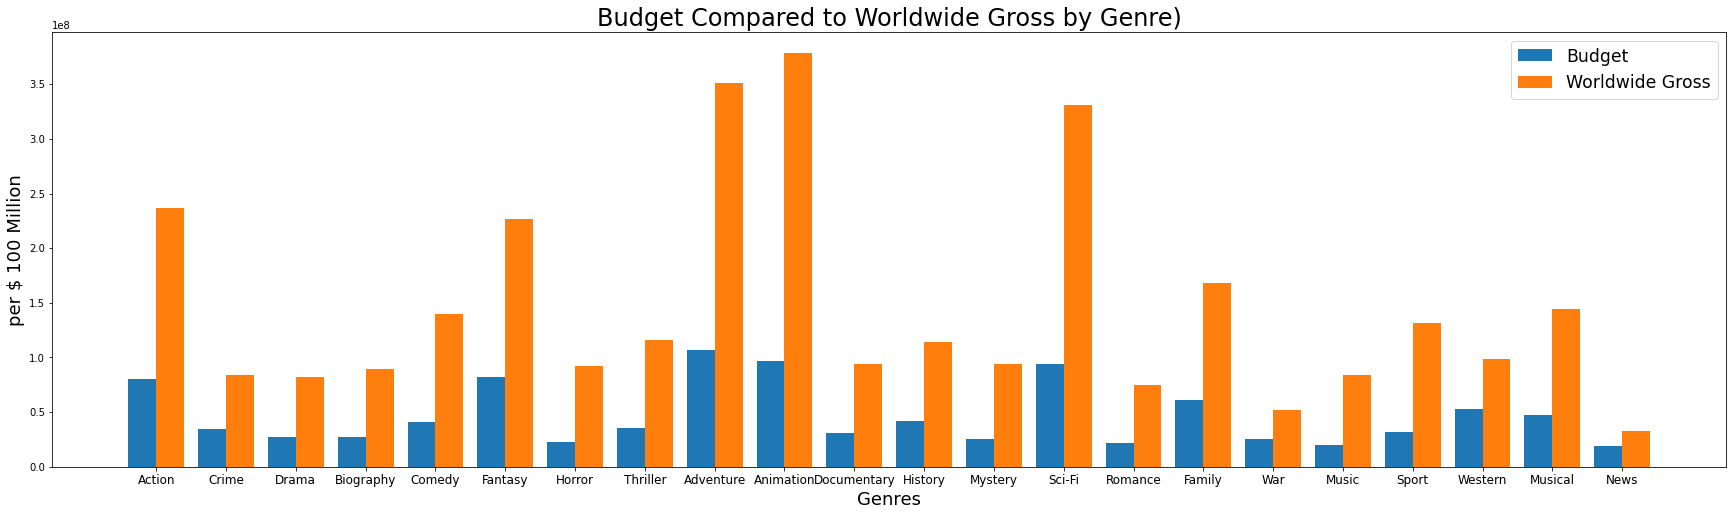

In [133]:
labels = [i[0] for i in budget_mean]
budge = [i[1] for i in budget_mean]
totals = [i[1] for i in totalGross_mean]

x = np.arange(len(labels))
width = 0.40

fig, ax = plt.subplots(figsize = (30,8))
ax.bar(x-width/2, budge, width, label = 'Budget')
ax.bar(x+width/2, totals, width, label = 'Worldwide Gross')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize =12)
ax.legend(fontsize = 'xx-large' )
ax.set_xlabel('Genres', fontsize = 18)
ax.set_ylabel('per $ 100 Million', fontsize = 18)
ax.set_title('Budget Compared to Worldwide Gross by Genre)', fontsize= 24);

In [134]:
budgetGrossMean_Ratio = [(genre, (budge_gbr.loc[budge_gbr[genre] == 1]
                        ['total_gross'].mean()/ budge_gbr.loc[budge_gbr[genre] == 1]
                        ['production_budget'].mean())) for genre in genre_count]

In [135]:
budgetGrossMean_Ratio

[('Action', 2.9575350932541458),
 ('Crime', 2.449371765009444),
 ('Drama', 2.960352906907339),
 ('Biography', 3.2320933017450346),
 ('Comedy', 3.4129125873987327),
 ('Fantasy', 2.7663252630781203),
 ('Horror', 4.029219085876342),
 ('Thriller', 3.2576860657623397),
 ('Adventure', 3.2766955842962386),
 ('Animation', 3.910593937646095),
 ('Documentary', 3.0791038699636375),
 ('History', 2.746007001946788),
 ('Mystery', 3.6770289903101356),
 ('Sci-Fi', 3.50869101789336),
 ('Romance', 3.3772083718769186),
 ('Family', 2.730782794378003),
 ('War', 2.0392557542997545),
 ('Music', 4.192837804081632),
 ('Sport', 4.128392780989711),
 ('Western', 1.847456418445773),
 ('Musical', 3.0538059297012308),
 ('News', 1.711508835978836)]

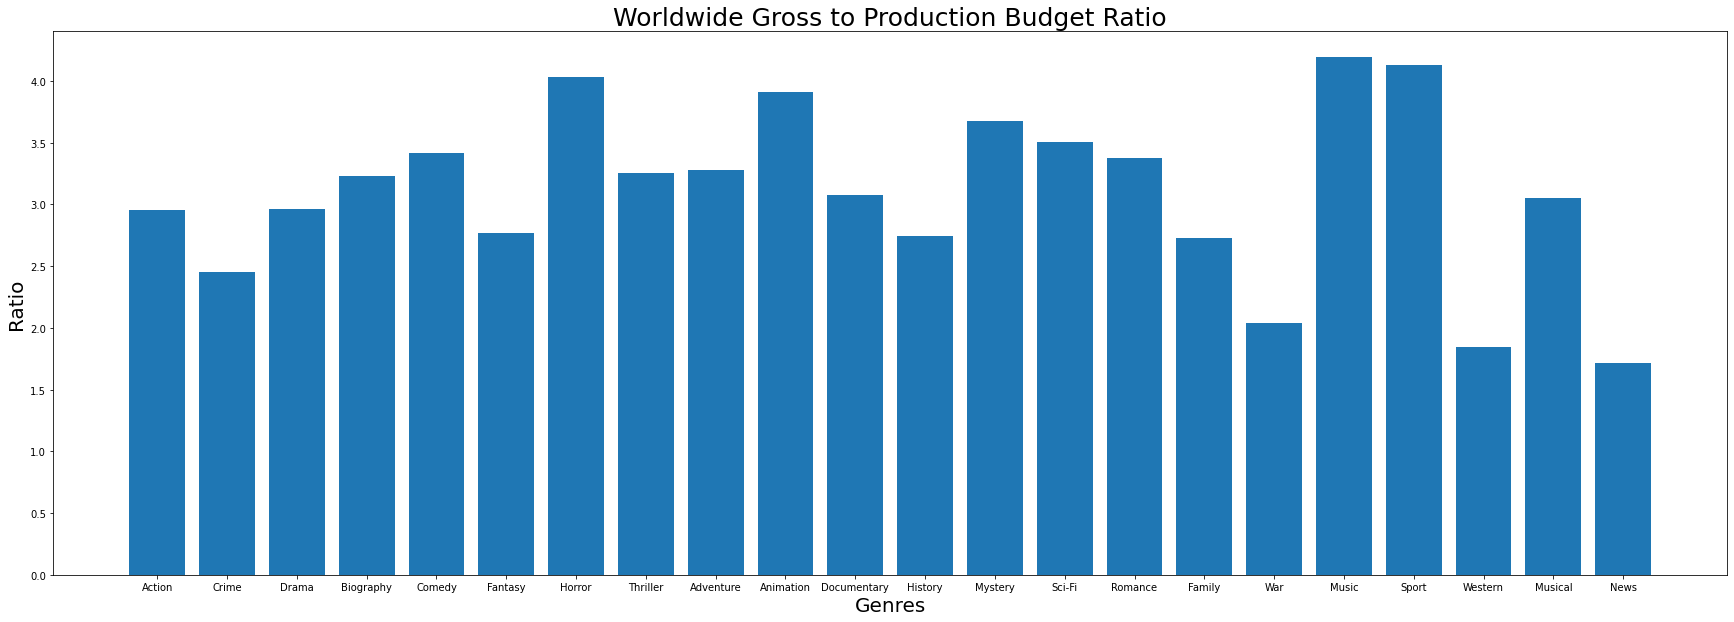

In [136]:
fig, ax = plt.subplots(figsize = (30,10))
ax.bar(x = [i[0] for i in budgetGrossMean_Ratio] , height = [i[1] for i in budgetGrossMean_Ratio])
ax.set_xlabel('Genres', fontsize = 20)
ax.set_ylabel('Ratio', fontsize = 20)
ax.set_title('Worldwide Gross to Production Budget Ratio', fontsize = 25);